In [33]:
#Helper packages

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import math
import missingno as msn
import streamlit as st

#Modelling packages

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [34]:
#Creating indices for rows
ind_list = []
for i in range(25421):
    ind_list.append(i)
#print(ind_list)

In [35]:
#Importing the excel data files and converting them to csv files

epa_file = pd.DataFrame(pd.read_excel("/home/emumen/Documents/Misk-DSI-2022/Predicting-and-Analyzing-Fuel-Efficiency/data/EPAGreen.xlsx"))
epa_file.to_csv("/home/emumen/Documents/Misk-DSI-2022/Predicting-and-Analyzing-Fuel-Efficiency/data/EPAGreen.csv", index = ind_list, header = True)
epa = pd.read_csv("/home/emumen/Documents/Misk-DSI-2022/Predicting-and-Analyzing-Fuel-Efficiency/data/EPAGreen.csv")
fuel = pd.read_csv("/home/emumen/Documents/Misk-DSI-2022/Predicting-and-Analyzing-Fuel-Efficiency/data/Fuel_Econ.csv")
epa = epa.rename(columns=({'Veh Class':'Veh_Class', "City MPG": "City_MPG", "Cmb MPG": "Cmb_MPG", "Greenhouse Gas Score": "Greenhouse_Score", "Comb CO2": "Comb_CO2", "Unnamed: 0.1": "Indeces", "Hwy MPG": "Hwy_MPG"}))

/tmp/ipykernel_4004/1712158289.py:6: DtypeWarning: Columns (46,78,93,96,98,123,124,138,142,143,146,150,163) have mixed types. Specify dtype option on import or set low_memory=False.
  fuel = pd.read_csv("/home/emumen/Documents/Misk-DSI-2022/Predicting-and-Analyzing-Fuel-Efficiency/data/Fuel_Econ.csv")


<font size="10">Predicting and Analyzing Fuel Efficiency</font>
<br>
<br>
<font size="6">Description</font>


|  Feature | Description  |
|:---:|:---:|
|  Model |  Car brand. |
| Disp  |  Vehicle engine's volume. |
|  Cyl |  Vehicle cylinders. |
| Trans  | Transmission type.  |
|  Drive | The number of wheels which power the vehicle.  |
|  Fuel | The type of fuel which powers the car.  |
|  Veh_Class |  Vehicle classification type. |
|  Air Pollution Score | Scoring for vehicle emmissions.  |
|  City MPG |  Fuel consumption in the city in miles per gallon. |
|  Hwy MPG | Fuel consumption in the Highway in miles per gallon.  |
|  Cmb MPG |  Weighted combined average for city and highway MPG. |
| Greenhouse Gas Score  |  Scoring for vehicle greenhouse gas emissions. |
|  Smartway | Certification for fuel-efficient cars.   |
| Comb CO2  |  Volume of CO2 emissions. |

<br>

|  Number of Entries |  Number of Features |
|:---:|:---:|
| 25,422  |  15 |

In [ ]:
#Concatenating files across the years 2013-2023 for the 3 different categories in fuel consumption.
#Reference: Siyal, G. (2022, March 14). How to consolidate multiple Excel workbooks with python. MUO. Retrieved August 18, 2022, from https://www.makeuseof.com/consolidate-excel-workbooks-python/ 

#Defining the input and output folders for the data.
input_file_path2 = "/home/emumen/Documents/Misk-DSI-2022/Predicting-and-Analyzing-Fuel-Efficiency/data/cat_data/"
output_file_path2 = "/home/emumen/Documents/Misk-DSI-2022/Predicting-and-Analyzing-Fuel-Efficiency/data/"

#Creating a liat for the file =s to concatenate.
excel_file_list2 = os.listdir(input_file_path2)
print(excel_file_list2)

#Concatenating the files that are in the list.
df2 = pd.DataFrame()
for excel_files in excel_file_list2:
     if excel_files.endswith(".xlsx"):
        df3 = pd.read_excel(input_file_path2+excel_files)
        df2 = df2.append(df3)


#Exporting the resulting combined data to the output folder
df2.to_excel(output_file_path2+"EPA/Econ_Guide.xlsx")

In [36]:
#Combining the EPAGreen Vehicle Guide and the Fuel Economy guide data files using pd.concat()

data = [epa, fuel]
epaf = pd.concat(data)
epaf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39520 entries, 0 to 12648
Columns: 183 entries, Indeces to Trans as listed in FE Guide (derived from col AA thru AF)
dtypes: float64(80), int64(1), object(102)
memory usage: 55.5+ MB


In [ ]:
#count = 0
#count1 = 0
#count2 = 0
#count3 = 0
#a = 0
#b = 0
#Lis = []
#Lis1 = []
#Lis2 = []
#Lis3 = []
#Lis_fin = []
#for ind in epa.index:
#    if "/" in epa['Comb CO2'][ind]:
#        epa[ind].drop()
for ind in epa.index:
    if isinstance(epa['Comb CO2'][ind], str) == True and "/" in epa['Comb CO2'][ind]:
        Lis.append(epa['Comb CO2'][ind][0:3])
        Lis1.append(epa['Comb CO2'][ind][4:])
for i in Lis:
        update = int(i)
        Lis2.append(update)
for z in Lis1:
        update1 = int(z)
        Lis3.append(update1)
        #print(epa['Comb CO2'][ind])
         #epa['Comb CO2'][ind].replace(epa['Comb CO2'][ind], epa['Comb CO2'][ind][0:3])
m = len(Lis2)
n = len(Lis3)
for fin in range(m):
        #print(Lis2[fin])
        a = Lis2[fin]
        for fin1 in range(n):
                if fin == fin1:
                        b = Lis3[fin1]
                        c = (a + b)/2
                        Lis_fin.append(c)
Lis1_fin = []
for y in Lis_fin:
        update2 = round(y)
        Lis1_fin.append(update2)

count_fin = 0
o = len(Lis1_fin)
for ind in epa.index:
        if isinstance(epa['Comb CO2'][ind], str) == True and "/" in epa['Comb CO2'][ind]:
                for z1 in range(o):
                        if z1 == ind:
                                epa['Comb CO2'][ind].replace(epa['Comb CO2'][ind], Lis1_fin[z1])


                
#for ind in epa.index:
#        if isinstance(epa['Comb CO2'][ind], str) == True and "/" in epa['Comb CO2'][ind]:
#                print(epa['Comb CO2'][ind])

#for ind in epa.index:
#   int(epa['Comb CO2'][ind])

#for ind in epa.index:
#    if isinstance(epa['City MPG'][ind], str) == True and "/" in epa['Comb CO2'][ind]:
        #count1 += 1
        #epa['Comb CO2'][ind].replace(epa['Comb CO2'][ind], epa['Comb CO2'][ind][0:3])

#for ind in epa.index:
#    if isinstance(epa['Hwy MPG'][ind], str) == True and "/" in epa['Comb CO2'][ind]:
        #count2 += 1
        #epa['Comb CO2'][ind].replace(epa['Comb CO2'][ind], epa['Comb CO2'][ind][0:3])

#for ind in epa.index:
#    if isinstance(epa['Cmb MPG'][ind], str) == True and "/" in epa['Comb CO2'][ind]:
        #count3 += 1
        #epa['Comb CO2'][ind].replace(epa['Comb CO2'][ind], epa['Comb CO2'][ind][0:3])

#print(count)
#print(count1)
#print(count2)
#print(count3)
#print(Lis)
#print(Lis1)
#print(Lis2)
#print(Lis3)
#print(Lis_fin)
#print(len(Lis))
#print(Lis1_fin)
        #print(df['Name'][ind], df['Stream'][ind])

#epa = epa.astype({"Unnamed: 0"})

<AxesSubplot:>

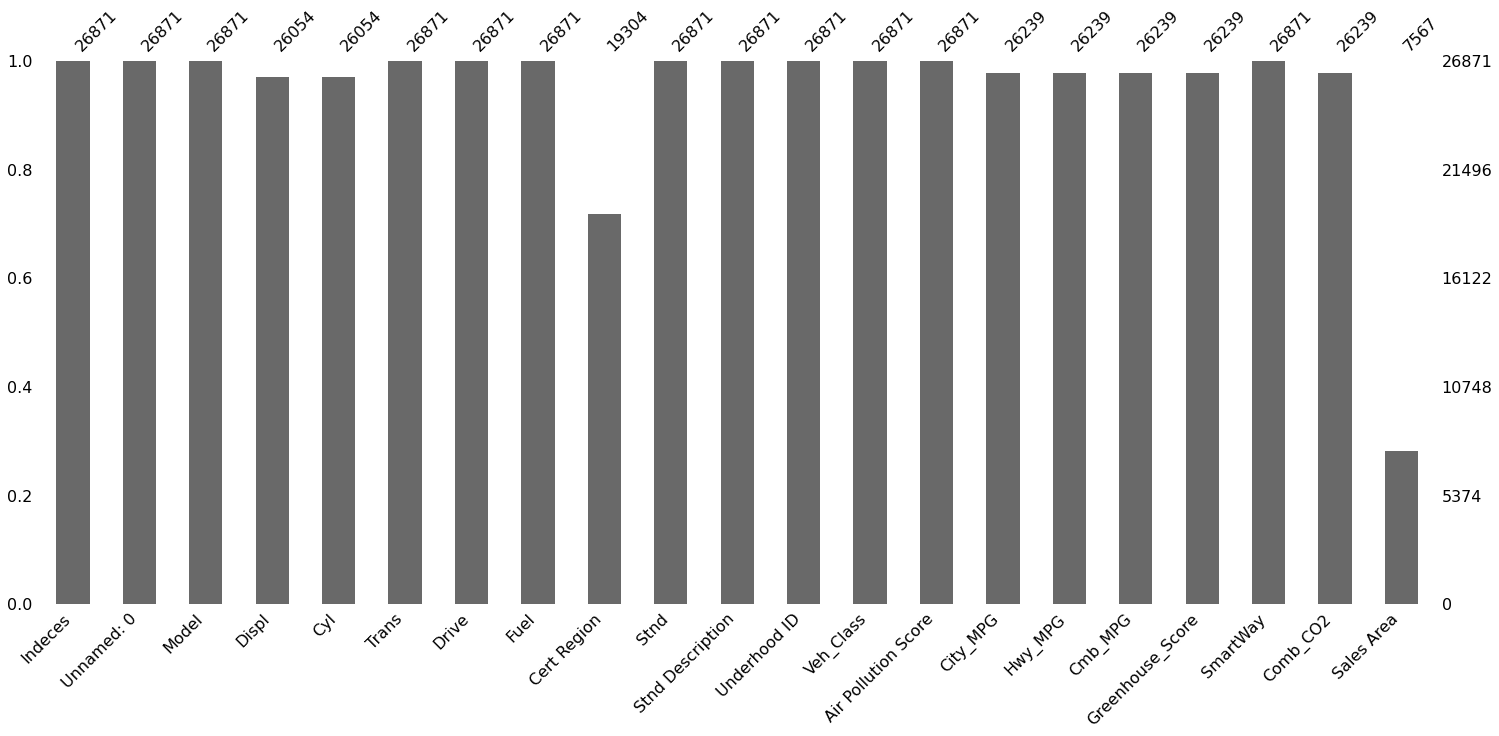

In [37]:
missing_epa = epa.isnull().sum()
#print(missing_epa)
msn.bar(epa)

<AxesSubplot:>

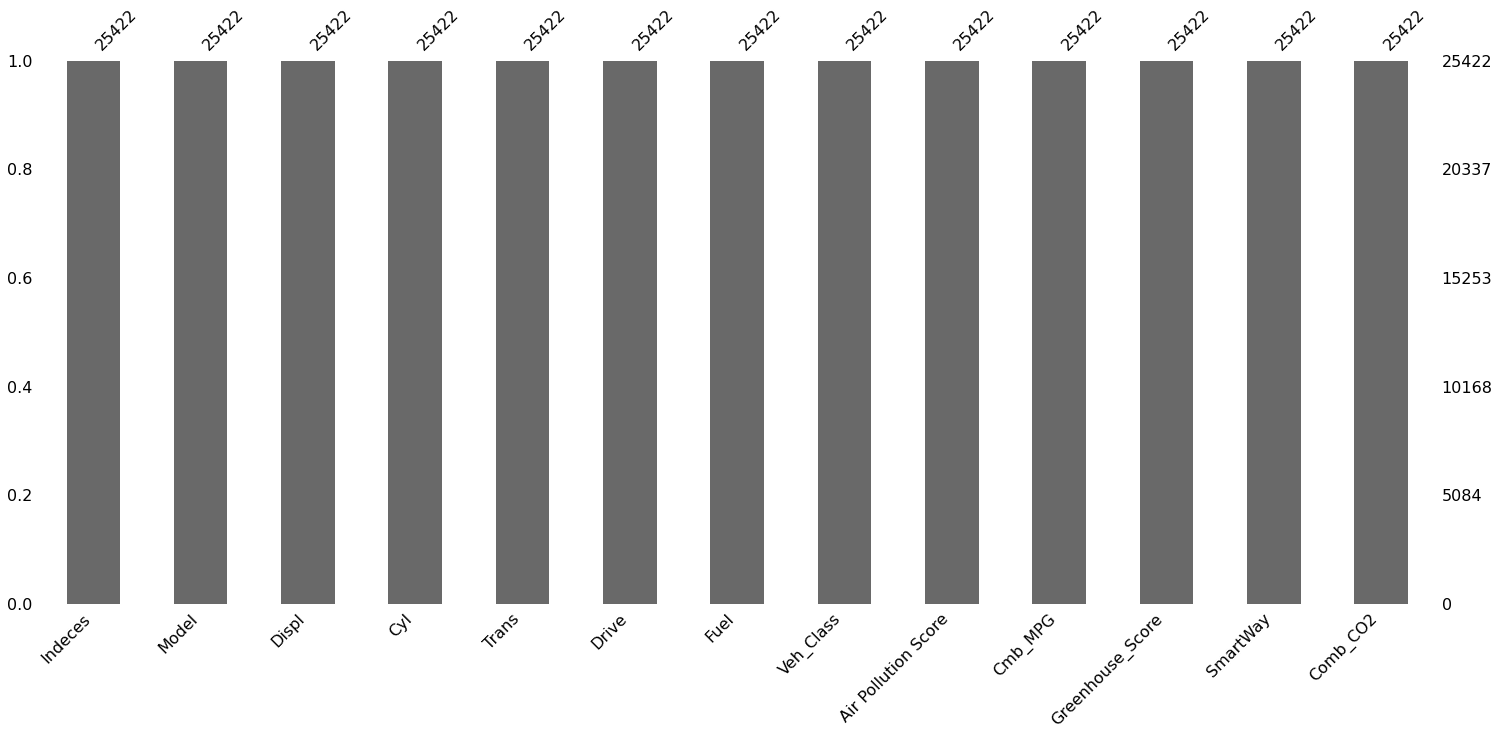

In [38]:
Columns = []
for column in epa:
    if epa[column].isna().sum() >= 0.6*26871:
#    if msn.bar(column) == 0:
        Columns.append(column)
    else:
        continue
epa.drop(Columns, axis = 1, inplace = True)
epa.drop(["Cert Region", "Stnd", "Stnd Description", "Underhood ID", "Unnamed: 0", "City_MPG", "Hwy_MPG"], axis = 1, inplace = True)
epa = epa.dropna()
#print(epa)
msn.bar(epa)
#epa.fillna(method ='pad')

In [39]:
#Comb CO2

a = 0
b = 0
g = 0
Las = []
for ind in epa.index:
    if isinstance(epa["Comb_CO2"][ind], str) == True and "/" in epa["Comb_CO2"][ind]:
        a = epa["Comb_CO2"][ind][0:3]
        e = int(a)
        b = epa["Comb_CO2"][ind][4:]
        f = int(b)
        epa.Comb_CO2[epa.Comb_CO2 == epa["Comb_CO2"][ind]] = (e + f)/2
for ind in epa.index:
    if isinstance(epa["Comb_CO2"][ind], str) == True:
        g = int(epa["Comb_CO2"][ind])
        epa.Comb_CO2[epa.Comb_CO2 == epa["Comb_CO2"][ind]] = g

for ind in epa.index:
    if isinstance(epa["Comb_CO2"][ind], float) == True:
        updt = round(epa["Comb_CO2"][ind])
        updt1 = int(updt)
        epa.Comb_CO2[epa.Comb_CO2 == epa["Comb_CO2"][ind]] = updt1

for ind in epa.index:
    Las.append(epa["Comb_CO2"][ind])


#for ind in epa.index:
#    if isinstance(epa['Comb_CO2'][ind], str) == True:
#        Las.append(epa['Comb_CO2'][ind])

#epa.info()
#print(Las)


#Cmb_MPG

a1 = 0
b1 = 0
g1 = 0
Las1 = []
for ind in epa.index:
    if isinstance(epa["Cmb_MPG"][ind], str) == True and "/" in epa["Cmb_MPG"][ind][0:2]:
        a1 = epa["Cmb_MPG"][ind][0]
        e1 = int(a1)
        b1 = epa["Cmb_MPG"][ind][2:]
        f1 = int(b1)
        epa.Cmb_MPG[epa.Cmb_MPG == epa["Cmb_MPG"][ind]] = (e1 + f1)/2
    elif isinstance(epa["Cmb_MPG"][ind], str) == True and "/" in epa["Cmb_MPG"][ind]:
        a1 = epa["Cmb_MPG"][ind][0:2]
        e1 = int(a1)
        b1 = epa["Cmb_MPG"][ind][3:]
        f1 = int(b1)
        epa.Cmb_MPG[epa.Cmb_MPG == epa["Cmb_MPG"][ind]] = (e1 + f1)/2
for ind in epa.index:
    if isinstance(epa["Cmb_MPG"][ind], str) == True:
        g1 = int(epa["Cmb_MPG"][ind])
        epa.Cmb_MPG[epa.Cmb_MPG == epa["Cmb_MPG"][ind]] = g1

for ind in epa.index:
    if isinstance(epa["Cmb_MPG"][ind], float) == True:
        updt2 = round(epa["Cmb_MPG"][ind])
        updt3 = int(updt2)
        epa.Cmb_MPG[epa.Cmb_MPG == epa["Cmb_MPG"][ind]] = updt3

for ind in epa.index:
    Las1.append(epa["Cmb_MPG"][ind])
#s1 = []
#for ind in epa.index:
#    s1.append(epa["Cmb_MPG"][ind])
#print(s1)
#print(Las1)


#City_MPG

#a2 = 0
#b2 = 0
#g2 = 0
#Las2 = []
#for ind in epa.index:
#    if isinstance(epa["City_MPG"][ind], str) == True and "/" in epa["City_MPG"][ind][0:2]:
#        a2 = epa["City_MPG"][ind][0]
#        e2 = int(a2)
#        b2 = epa["City_MPG"][ind][2:]
#        f2 = int(b2)
#        epa.City_MPG[epa.City_MPG == epa["City_MPG"][ind]] = (e2 + f2)/2
#    elif isinstance(epa["City_MPG"][ind], str) == True and "/" in epa["City_MPG"][ind]:
#        a2 = epa["City_MPG"][ind][0:2]
#        e2 = int(a2)
#        b2 = epa["City_MPG"][ind][3:]
#        f2 = int(b2)
#        epa.City_MPG[epa.City_MPG == epa["City_MPG"][ind]] = (e2 + f2)/2
#for ind in epa.index:
#    if isinstance(epa["City_MPG"][ind], str) == True:
#        g2 = int(epa["City_MPG"][ind])
#        epa.City_MPG[epa.City_MPG == epa["City_MPG"][ind]] = g2

#for ind in epa.index:
#    if isinstance(epa["City_MPG"][ind], float) == True:
#        updt4 = round(epa["City_MPG"][ind])
#        updt5 = int(updt4)
#        epa.City_MPG[epa.City_MPG == epa["City_MPG"][ind]] = updt5

#for ind in epa.index:
#    Las2.append(epa["City_MPG"][ind])
#print(Las2)


#Hwy_MPG

#a3 = 0
#b3 = 0
#g3 = 0
#Las3 = []
#for ind in epa.index:
#    if isinstance(epa["Hwy_MPG"][ind], str) == True and "/" in epa["Hwy_MPG"][ind][0:2]:
#        a3 = epa["Hwy_MPG"][ind][0]
#        e3 = int(a3)
#        b3 = epa["Hwy_MPG"][ind][2:]
#        f3 = int(b3)
#        epa.Hwy_MPG[epa.Hwy_MPG == epa["Hwy_MPG"][ind]] = (e3 + f3)/2
#    elif isinstance(epa["Hwy_MPG"][ind], str) == True and "/" in epa["Hwy_MPG"][ind]:
#        a3 = epa["Hwy_MPG"][ind][0:2]
#        e3 = int(a3)
#        b3 = epa["Hwy_MPG"][ind][3:]
#        f3 = int(b3)
#        epa.Hwy_MPG[epa.Hwy_MPG == epa["Hwy_MPG"][ind]] = (e3 + f3)/2
#for ind in epa.index:
#    if isinstance(epa["Hwy_MPG"][ind], str) == True:
#        g3 = int(epa["Hwy_MPG"][ind])
#        epa.Hwy_MPG[epa.Hwy_MPG == epa["Hwy_MPG"][ind]] = g3
#
#for ind in epa.index:
#    if isinstance(epa["Hwy_MPG"][ind], float) == True:
#        updt6 = round(epa["Hwy_MPG"][ind])
#        updt7 = int(updt6)
#        epa.Hwy_MPG[epa.Hwy_MPG == epa["Hwy_MPG"][ind]] = updt7

#for ind in epa.index:
#    Las3.append(epa["Hwy_MPG"][ind])
##print(Las2)

/tmp/ipykernel_4004/612475830.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epa.Comb_CO2[epa.Comb_CO2 == epa["Comb_CO2"][ind]] = (e + f)/2
/tmp/ipykernel_4004/612475830.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epa.Comb_CO2[epa.Comb_CO2 == epa["Comb_CO2"][ind]] = (e + f)/2
/tmp/ipykernel_4004/612475830.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epa.Comb_CO2[epa.Comb_CO2 == epa["Comb_CO2"][ind]] = (e + f)/2
/

In [40]:
#L5 = []
#L6 = []
#for ind in epa.index:
#    if isinstance(epa["Cmb_MPG"][ind], str) == True and "/" in epa["Cmb_MPG"][ind][0:2]:
#        epa = epa.drop(ind)
#for ind in epa.index:
#    if isinstance(epa["Cmb_MPG"][ind], str) == True and "/" in epa["Cmb_MPG"][ind]:
#        L5.append(epa["Cmb_MPG"][ind][0:2])
#for i in L5:
#    if isinstance(i, str) == True and "/" in i:
#        L6.append(i)
#print(L5)
#print(L6)


#L7 = []
#L8 = []
#for ind in epa.index:
#    if isinstance(epa["City_MPG"][ind], str) == True and "/" in epa["City_MPG"][ind]:
#        L7.append(epa["City_MPG"][ind][0:2])
#for i in L7:
#    if isinstance(i, str) == True and "/" in i:
#        L8.append(i)
#for ind in epa.index:
#    if isinstance(epa["City_MPG"][ind], str) == True and "/" in epa["City_MPG"][ind][0:2]:
#        epa = epa.drop(ind)
#print(L7)
#print(L8)
#for ind in epa.index:
#    print(epa["Air Pollution Score"][ind])

l12 = []
for ind in epa.index:
    if epa["Air Pollution Score"][ind] == "Mod":
        epa = epa.drop(ind)

#L9 = []
#count = 11
#for ind in epa.index:
#    if isinstance(epa["Greenhouse_Score"][ind], str) == True and epa["Greenhouse_Score"][ind] == "Mod":
#        L9.append(epa["Greenhouse_Score"][ind])
#print(L9)
#print(len(L9))

#L10 = []
#count = 11
#for ind in epa.index:
#    if isinstance(epa["Air Pollution Score"][ind], str) == True and epa["Air Pollution Score"][ind] == "Mod":
#        L10.append(epa["Air Pollution Score"][ind])
#print(L9)
#print(len(L10))


In [44]:
epa['Comb_CO2'] = epa['Comb_CO2'].astype('int')
epa["Cmb_MPG"] = epa["Cmb_MPG"].astype('int')
#epa["City_MPG"] = epa["City_MPG"].astype('int')
epa["Greenhouse_Score"] = epa["Greenhouse_Score"].astype(int)
epa["Air Pollution Score"] = epa["Air Pollution Score"].astype(int)
epa["Drive"] = epa["Drive"].astype(str)
epa["Trans"] = epa["Trans"].astype(str)
epa["Fuel"] = epa["Fuel"].astype(str)
epa["Veh_Class"] = epa["Veh_Class"].astype(str)
epa["Model"] = epa["Model"].astype(str)
epa["SmartWay"] = epa["SmartWay"].astype(str)
#epa.info()
#print(epa[epa['Comb_CO2'].isnull()])
#epa["Comb_CO2"].astype(int)
#convert_dict = {"Comb CO2": float}
#epa = epa.astype("convert_dict")
#print(epa.dtypes)

<font size="7">Exploratory Data Analysis</font>
<br>
<br>
<br>

In [45]:
epa.head()
epa.tail()

,Indeces,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air Pollution Score,Cmb_MPG,Greenhouse_Score,SmartWay,Comb_CO2
26866,26866,VOLVO XC 70,3.2,6.0,SemiAuto-6,2WD,Gasoline,small SUV,6,21,5,No,414
26867,26867,VOLVO XC 90,3.2,6.0,SemiAuto-6,4WD,Gasoline,standard SUV,5,18,4,No,477
26868,26868,VOLVO XC 90,3.2,6.0,SemiAuto-6,4WD,Gasoline,standard SUV,6,18,4,No,477
26869,26869,VOLVO XC 90,3.2,6.0,SemiAuto-6,2WD,Gasoline,standard SUV,5,19,4,No,472
26870,26870,VOLVO XC 90,3.2,6.0,SemiAuto-6,2WD,Gasoline,standard SUV,6,19,4,No,472


In [46]:
epa.describe()

,Indeces,Displ,Cyl,Air Pollution Score,Cmb_MPG,Greenhouse_Score,Comb_CO2
count,25270.000000,25270.000000,25270.000000,25270.000000,25270.000000,25270.000000,25270.000000
mean,13362.466245,3.110495,5.581678,5.203601,23.796953,4.980609,400.256549
std,7735.652157,1.338164,1.861237,1.641375,7.687373,1.813437,104.394630
min,0.000000,0.600000,2.000000,1.000000,9.000000,1.000000,22.000000
25%,6661.250000,2.000000,4.000000,5.000000,19.000000,4.000000,331.000000
50%,13435.500000,3.000000,6.000000,5.000000,23.000000,5.000000,392.000000
75%,19986.750000,3.700000,6.000000,6.000000,27.000000,6.000000,465.000000
max,26870.000000,8.400000,16.000000,9.000000,94.000000,10.000000,979.000000


In [47]:
epa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25270 entries, 0 to 26870
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Indeces              25270 non-null  int64  
 1   Model                25270 non-null  object 
 2   Displ                25270 non-null  float64
 3   Cyl                  25270 non-null  float64
 4   Trans                25270 non-null  object 
 5   Drive                25270 non-null  object 
 6   Fuel                 25270 non-null  object 
 7   Veh_Class            25270 non-null  object 
 8   Air Pollution Score  25270 non-null  int64  
 9   Cmb_MPG              25270 non-null  int64  
 10  Greenhouse_Score     25270 non-null  int64  
 11  SmartWay             25270 non-null  object 
 12  Comb_CO2             25270 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 3.7+ MB


<AxesSubplot:>

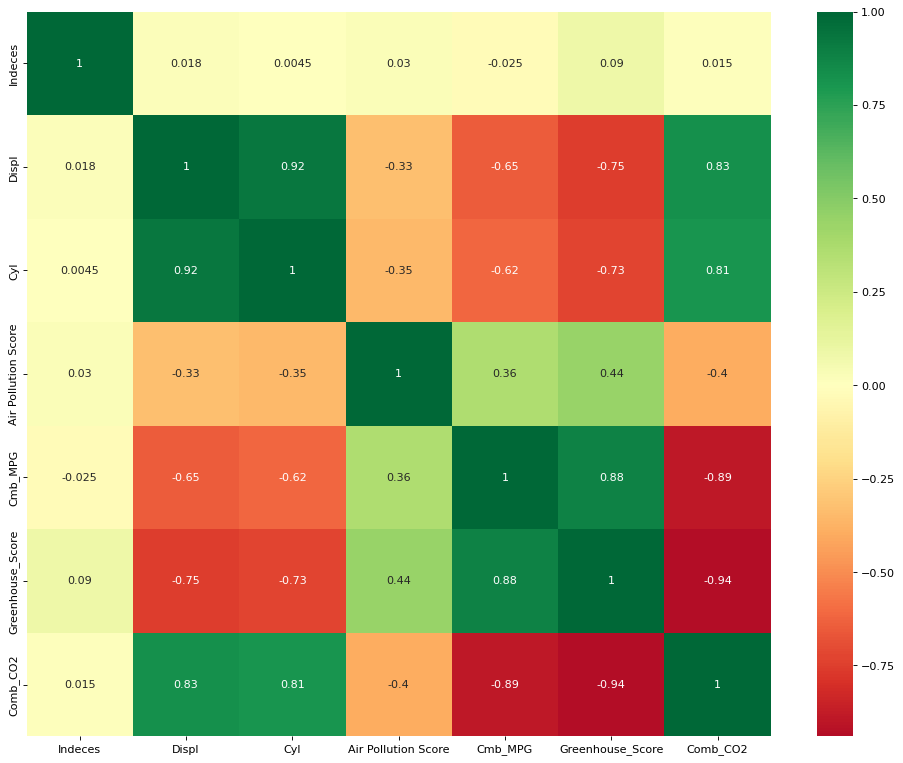

In [48]:
plt.figure(figsize=(15,12), dpi= 80)
sns.heatmap(epa.corr(), xticklabels=epa.corr().columns, yticklabels=epa.corr().columns, cmap='RdYlGn', center=0, annot=True)

In [49]:
cyl_info = epa[["Cyl","Cmb_MPG"]]
cyl_info.groupby("Cyl").mean()

,Cmb_MPG
Cyl,
2.0,70.583333
3.0,33.365854
4.0,28.502074
5.0,24.035088
6.0,21.347864
8.0,17.055651
10.0,15.459459
12.0,14.111524
16.0,10.250000


In [18]:
two_Cyl = epa.loc[(epa["Cyl"] == "2") & (epa["Cmb_MPG"])]
print(two_Cyl)

Empty DataFrame
Columns: [Indeces, Model, Displ, Cyl, Trans, Drive, Fuel, Veh_Class, Air Pollution Score, City_MPG, Hwy_MPG, Cmb_MPG, Greenhouse_Score, SmartWay, Comb_CO2]
Index: []


In [50]:
size_eff = epa.groupby('Veh_Class')[['Comb_CO2']].mean()
size_eff1 = pd.DataFrame(size_eff)
size_eff1.plot(x = "Veh_Class", y = "Comb_CO2", kind = "bar")
#sns.catplot(x = "Veh Class", y = str('Comb_CO2'), data = epa)
#print(size_eff)

KeyError: 'Veh_Class'

In [18]:
mile_eff = epa.groupby('Cyl')[['City MPG']].mean()
#print(mile_eff)
#plt.bar(mile)
#epa.filter(items=['Cyl', 'City MPG']).mean()

Empty DataFrame
Columns: []
Index: [2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0, 16.0]


/tmp/ipykernel_2873/3574601475.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  mile_eff = epa.groupby('Cyl')[['City MPG']].mean()


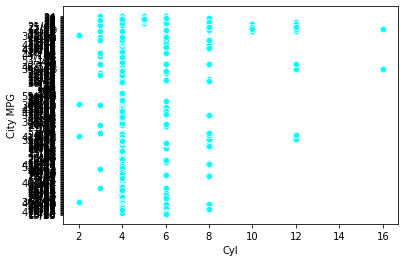

In [18]:
sns.scatterplot(x = "Cyl", y = "City MPG", color = "cyan", data = epa);

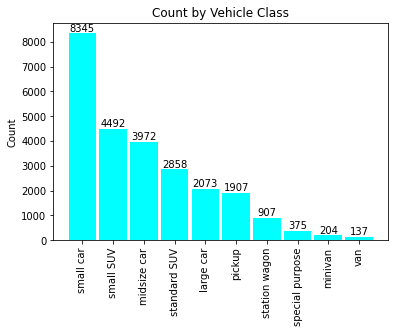

In [51]:
#Finding the count if Vehicle Class categories
veh_class_count = epa['Veh_Class'].value_counts()
#print(veh_class_count)
x = np.arange(len(veh_class_count.index))
width = 0.9
fig, ax = plt.subplots()
bars = ax.bar(x - width/2, veh_class_count.values, width, color = 'cyan')
ax.set_ylabel('Count')
ax.set_title('Count by Vehicle Class')
ax.set_xticks(x - width/2, veh_class_count.index)
ax.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

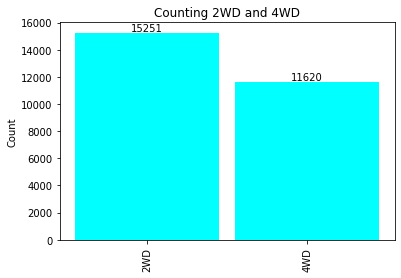

In [25]:
drive_count = epa['Drive'].value_counts()
x = np.arange(len(drive_count.index))
width = 0.9
fig, ax = plt.subplots()
bars = ax.bar(x - width/2, drive_count.values, width, color = 'cyan')
ax.set_ylabel('Count')
ax.set_title('Counting 2WD and 4WD')
ax.set_xticks(x - width/2, drive_count.index)
ax.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

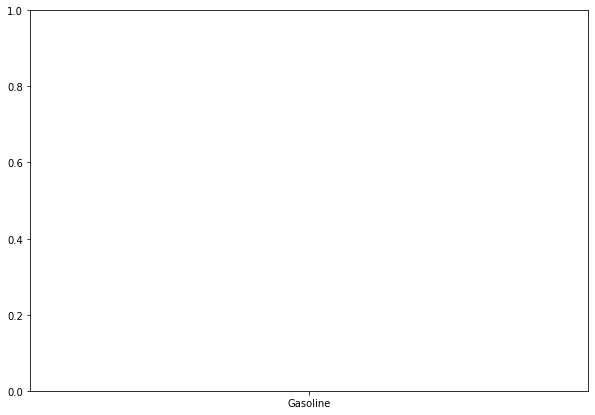

In [26]:
fig = plt.figure(figsize =(10, 7))
plt.bar(epa['Fuel'], epa['City MPG'], color = 'orange')
plt.show()

In [ ]:
sns.catplot((y = ))

<font size="7">Prediction Model</font>
<br>
<br>
<font size="6">Gradient Boosting</font>

In [52]:
#Splitting the data into training and testing segments

train,test = train_test_split(epa, train_size = 0.8, test_size = 0.2, random_state = 123)
#This is to separate the features or attribute from the target
X_train = train.drop("Cmb_MPG", axis=1)
y_train = train[["Cmb_MPG"]]

# One hot encode remaining nominal features
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

# Combine into a pre-processing pipeline
preprocessor = ColumnTransformer(
  remainder="passthrough",
  transformers=[
   ("one-hot", encoder, selector(dtype_include="object")),
   ]
  )

In [54]:
# GBM Estimator Model Object
xgb_mod = xgb.XGBRegressor()

#Loss Function
loss = 'neg_root_mean_squared_error'

#Creating a pipeline
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("xgb_mod", xgb_mod),
])


kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# Setting the Hyperparameters
hyper_grid = {
  'xgb_mod__n_estimators': [1000, 2500, 5000],
  'xgb_mod__learning_rate': [0.001, 0.01, 0.1],
  'xgb_mod__max_depth': [3, 5, 7, 9],
  'xgb_mod__min_child_weight': [1, 5, 15] 
}

# Implementing a five fold CV
results = cross_val_score(model_pipeline, X_train, y_train, cv=kfold, scoring=loss)

print('Gradient Boosting RMSE: ', np.abs(np.mean(results)), end='\n\n')


# create random search object
random_search = RandomizedSearchCV(
    model_pipeline, 
    param_distributions=hyper_grid, 
    n_iter=20, 
    cv=kfold, 
    scoring=loss, 
    n_jobs=-1, 
    random_state=13
)

# Execute random search
random_search_results = random_search.fit(X_train, y_train)

# Best model score
print('Gradient Boosting random search RMSE: ', np.abs(random_search_results.best_score_), end='\n\n')

# Optimal penalty parameter in grid search
print('Optimal hyperparameter')
print("xgb_mod__n_estimators: ", random_search_results.best_estimator_.get_params().get('xgb_mod__n_estimators'))
print("xgb_mod__learning_rate: ", random_search_results.best_estimator_.get_params().get('xgb_mod__learning_rate'))
print("xgb_mod__max_depth: ", random_search_results.best_estimator_.get_params().get('xgb_mod__max_depth'))
print("xgb_mod__min_child_weight: ", random_search_results.best_estimator_.get_params().get('xgb_mod__min_child_weight'), end="\n\n")

Gradient Boosting RMSE:  0.45470399610022855



TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}